In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import DBSCAN , KMeans
from sklearn.metrics import silhouette_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('penguins.csv')
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
df.info

<bound method DataFrame.info of      culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0                39.1             18.7              181.0       3750.0    MALE
1                39.5             17.4              186.0       3800.0  FEMALE
2                40.3             18.0              195.0       3250.0  FEMALE
3                 NaN              NaN                NaN          NaN     NaN
4                36.7             19.3              193.0       3450.0  FEMALE
..                ...              ...                ...          ...     ...
339               NaN              NaN                NaN          NaN     NaN
340              46.8             14.3              215.0       4850.0  FEMALE
341              50.4             15.7              222.0       5750.0    MALE
342              45.2             14.8              212.0       5200.0  FEMALE
343              49.9             16.1              213.0       5400.0    MALE

[344 rows x 5 colum

In [5]:
df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [10]:
df['sex'].value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

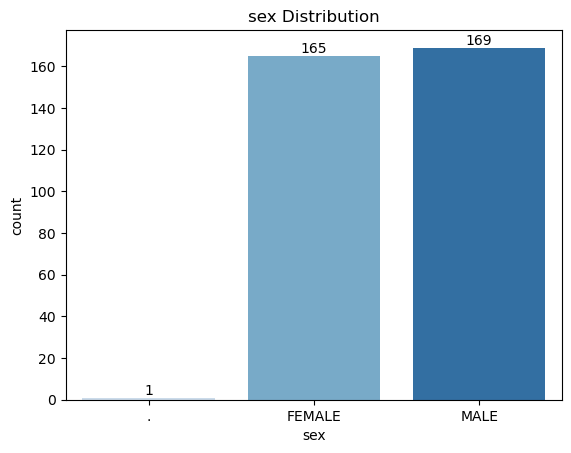

In [11]:
sex_counts=df['sex'].value_counts().sort_index()

ax=sns.barplot(
    x=sex_counts.index,
    y=sex_counts.values,
    palette=sns.color_palette("Blues",len(sex_counts))
)

plt.title('sex Distribution')
plt.xlabel("sex")
plt.ylabel("count")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [12]:
df=df[df['sex']!='.']

In [13]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

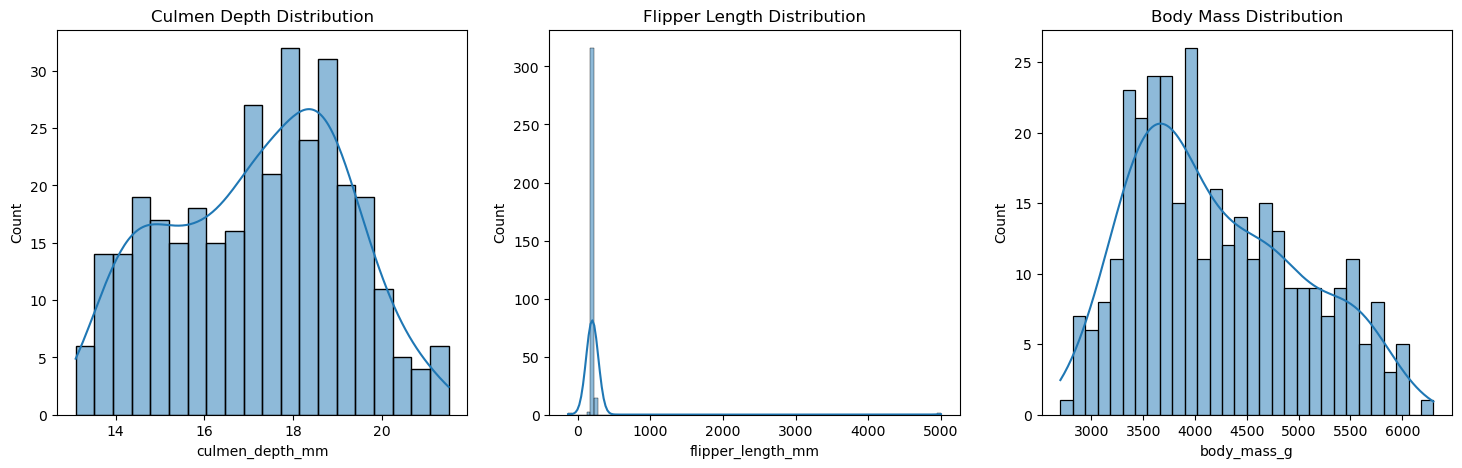

In [14]:
fig, axs=plt.subplots(1,3, figsize=(18,5))

sns.histplot(df['culmen_depth_mm'],bins=20,kde=True,ax=axs[0])
axs[0].set_title('Culmen Depth Distribution')

sns.histplot(df['flipper_length_mm'],bins=100,kde=True,ax=axs[1])
axs[1].set_title('Flipper Length Distribution')

sns.histplot(df['body_mass_g'],bins=30,kde=True,ax=axs[2])
axs[2].set_title('Body Mass Distribution')

plt.show()

<Figure size 500x600 with 0 Axes>

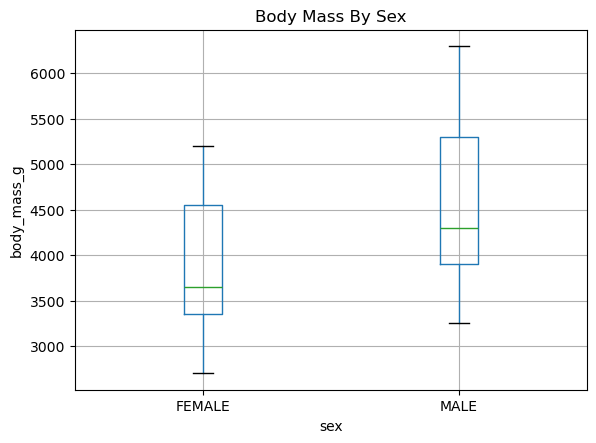

In [15]:
plt.figure(figsize=(5,6))
df.boxplot(column="body_mass_g",by="sex")
plt.title("Body Mass By Sex")
plt.suptitle("")
plt.xlabel('sex')
plt.ylabel('body_mass_g')
plt.show()

In [16]:
df.head(3)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE


In [17]:
encoder=LabelEncoder()
df['sex']=encoder.fit_transform(df['sex'])

In [18]:
df.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   334 non-null    float64
 1   culmen_depth_mm    334 non-null    float64
 2   flipper_length_mm  334 non-null    float64
 3   body_mass_g        334 non-null    float64
 4   sex                334 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.7 KB


In [20]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,43.986826,17.173952,214.347305,4207.185629,0.505988
std,5.461540,1.973277,263.648447,804.009294,0.500714
min,32.100000,13.100000,-132.000000,2700.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.575000,18.700000,213.000000,4768.750000,1.000000
max,59.600000,21.500000,5000.000000,6300.000000,1.000000


In [21]:
scaler=StandardScaler()
scaled=scaler.fit_transform(df)

In [22]:
 scaled

array([[-0.89611333,  0.77451731, -0.12667376, -0.56948543,  0.98809481],
       [-0.82276402,  0.11472642, -0.10768065, -0.50720379, -1.01204863],
       [-0.67606541,  0.41924529, -0.07349307, -1.19230185, -1.01204863],
       ...,
       [ 1.17600463, -0.74807704,  0.02906968,  1.92178024,  0.98809481],
       [ 0.22246362, -1.20485535, -0.00891652,  1.23668218, -1.01204863],
       [ 1.08431799, -0.54506446, -0.0051179 ,  1.48580875,  0.98809481]])

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.

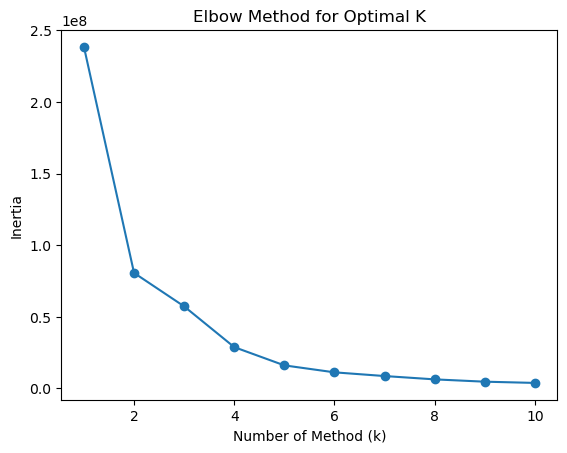

In [23]:
inertia=[]
k_range=range(1,11)

for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

#elbow curve

plt.plot(k_range,inertia,marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Method (k)')
plt.ylabel('Inertia')
plt.show()

In [34]:
kmeans=KMeans(n_clusters=2,random_state=400)
df['KMeans_clusters']=kmeans.fit_predict(df)
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,KMeans_clusters,DBSCAN_Cluster
0,39.1,18.7,181.0,3750.0,1,1,-1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,-1
4,36.7,19.3,193.0,3450.0,0,1,1
5,39.3,20.6,190.0,3650.0,1,1,2
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,-1
340,46.8,14.3,215.0,4850.0,0,0,-1
341,50.4,15.7,222.0,5750.0,1,0,-1
342,45.2,14.8,212.0,5200.0,0,0,-1


In [25]:
KMeans_score=silhouette_score(df,kmeans.labels_)
print("k-means silhouette score : ",KMeans_score)

k-means silhouette score :  0.6229737284413455


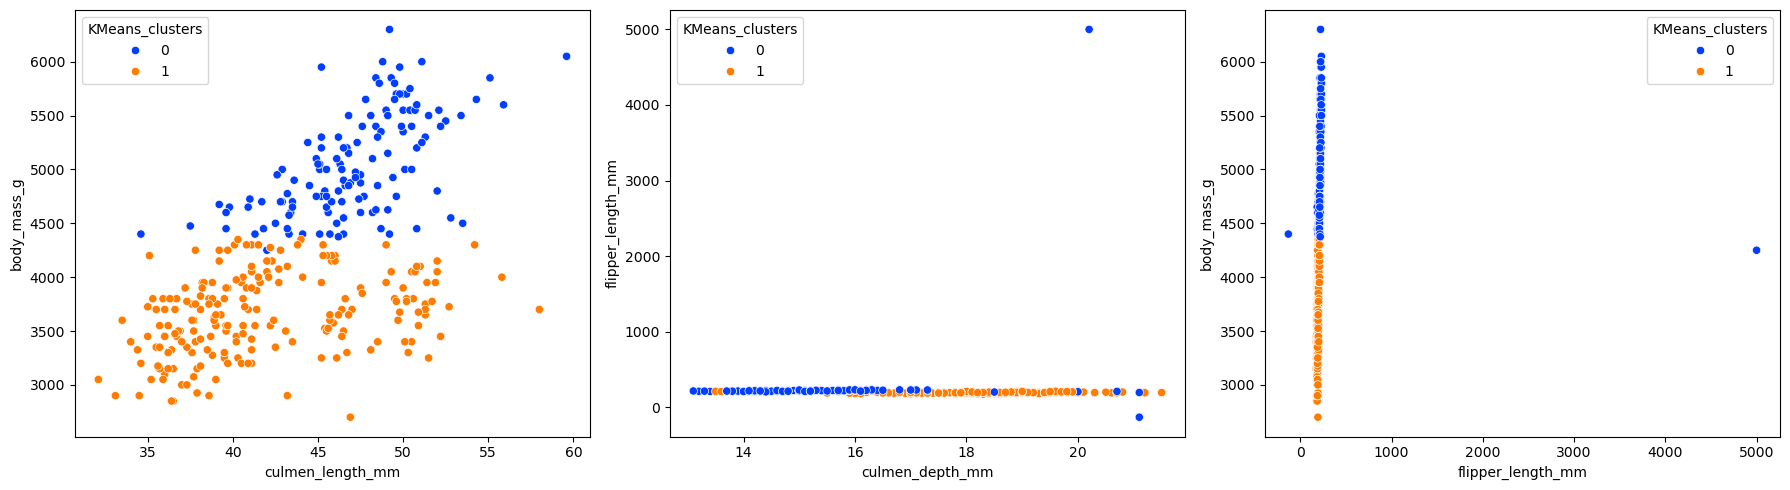

In [26]:
fig,axs=plt.subplots(1,3,figsize=(18,5))

sns.scatterplot(data=df,x='culmen_length_mm',y='body_mass_g',hue='KMeans_clusters',ax=axs[0],palette='bright')
sns.scatterplot(data=df,x='culmen_depth_mm',y='flipper_length_mm',hue='KMeans_clusters',ax=axs[1],palette='bright')
sns.scatterplot(data=df,x='flipper_length_mm',y='body_mass_g',hue='KMeans_clusters',ax=axs[2],palette='bright')

plt.tight_layout()
plt.show()

In [27]:
cluster_summary=df.groupby('KMeans_clusters').agg(
    Average_culmen_length_mm=('culmen_length_mm','mean'),
    Average_culmen_depth_mm=('culmen_depth_mm','mean'),
    Average_sex=('sex','mean'),
    Average_flipper_length_mm=('flipper_length_mm','mean'),
    Average_body_mass_g=('body_mass_g','mean'),
    Customer_Count=('sex','count')
)
cluster_summary

,Average_culmen_length_mm,Average_culmen_depth_mm,Average_sex,Average_flipper_length_mm,Average_body_mass_g,Customer_Count
KMeans_clusters,,,,,,
0,47.169466,15.758779,0.618321,248.778626,5061.832061,131
1,41.933005,18.087192,0.433498,192.128079,3655.665025,203


In [28]:
dbscan=DBSCAN(eps=12,min_samples=5)
df['DBSCAN_Cluster']=dbscan.fit_predict(df.iloc[:,:-1])

In [29]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,KMeans_clusters,DBSCAN_Cluster
0,39.1,18.7,181.0,3750.0,1,1,-1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,-1
4,36.7,19.3,193.0,3450.0,0,1,1
5,39.3,20.6,190.0,3650.0,1,1,2
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,-1
340,46.8,14.3,215.0,4850.0,0,0,-1
341,50.4,15.7,222.0,5750.0,1,0,-1
342,45.2,14.8,212.0,5200.0,0,0,-1


In [30]:
dbscan_labels=df['DBSCAN_Cluster']
valid_mask=dbscan_labels !=-1
valid_features=df[valid_mask]
valid_labels=dbscan_labels[valid_mask]

In [31]:
if len(np.unique(valid_labels))>1:
    dbscan_score=silhouette_score(valid_features,valid_labels)
    print("DBSCAN Silhouette Score : ",dbscan_score)
else:
    print("DBSCAN produced too many noice points. No valid clusters found.")

DBSCAN Silhouette Score :  0.8525738096956038


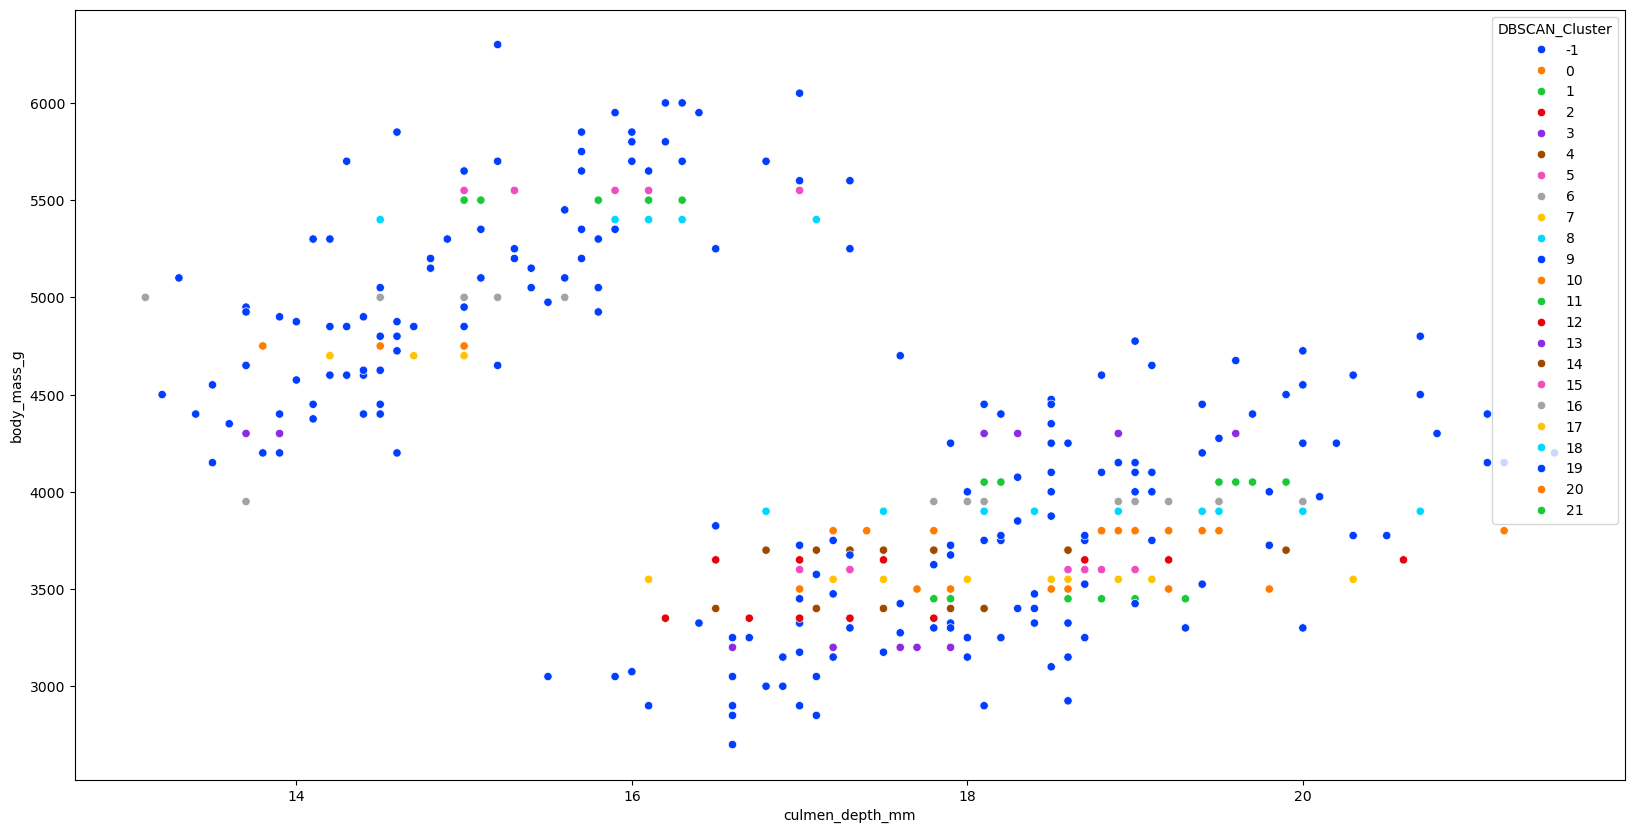

In [32]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x='culmen_depth_mm',y='body_mass_g',hue='DBSCAN_Cluster',palette='bright')
plt.show()

In [33]:
cluster_summary=df.groupby('DBSCAN_Cluster').agg(
    Average_culmen_length_mm=('culmen_length_mm','mean'),
    Average_culmen_depth_mm=('culmen_depth_mm','mean'),
    Average_sex=('sex','mean'),
    Average_flipper_length_mm=('flipper_length_mm','mean'),
    Average_body_mass_g=('body_mass_g','mean'),
    Customer_Count=('sex','count')
)
#display the cluster summary

print("\nCluster Summary : ")
cluster_summary


Cluster Summary : 


,Average_culmen_length_mm,Average_culmen_depth_mm,Average_sex,Average_flipper_length_mm,Average_body_mass_g,Customer_Count
DBSCAN_Cluster,,,,,,
-1,44.228495,16.903763,0.494624,226.516129,4294.892473,186
0,41.550000,18.833333,0.583333,190.916667,3800.000000,12
1,40.142857,18.471429,0.142857,192.857143,3450.000000,7
2,44.716667,18.250000,0.500000,189.833333,3650.000000,6
3,39.360000,17.400000,0.000000,187.600000,3200.000000,5
4,43.120000,17.920000,0.200000,188.900000,3700.000000,10
5,40.785714,18.100000,0.285714,187.714286,3600.000000,7
6,43.760000,18.370000,0.800000,195.900000,3950.000000,10
7,40.577778,18.244444,0.444444,189.777778,3550.000000,9
